In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from load_dataset import load_dataset

In [2]:
# set path vars

#dataset_path = "C:\\Users\\user\\PycharmProjects\\my_cnn\\mnist_png"
dataset_path = 'mnist_png'

In [3]:
# activation functions and their derivatives

# sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

#sigmoid derivative
def sigmoid_d(x):
    return np.exp(-x) / np.power(1 + np.exp(-x), 2.)

In [4]:
# load the MNIST dataset

dataset = load_dataset(dataset_path)
X = dataset['train']['X']
Y = dataset['train']['Y']

In [5]:
# set the layer sizes

layer_sizes = [
    X.shape[0],
    500,
    100,
    10
]

In [6]:
# initialize parameters

W1 = np.random.randn(layer_sizes[1], layer_sizes[0])
b1 = np.zeros((layer_sizes[1], 1))

W2 = np.random.randn(layer_sizes[2], layer_sizes[1])
b2 = np.zeros((layer_sizes[2], 1))

W3 = np.random.randn(layer_sizes[3], layer_sizes[2])
b3 = np.zeros((layer_sizes[3], 1))

In [7]:
# train the model

iterations = 2500
print_cost = True

samples = X.shape[1] # number of training samples (60000 here)

learning_rate = 0.00001

cost = .0

for i in range(iterations):

    # forward propagation
    #   push input data through the network
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)

    # MSE
    #   cost function, to compute the error
    cost = np.sum(np.power(Y - A3, 2.)) / samples
    # cost = -1 / samples * sum([Y[0][i] * np.log(A3[0][i]) + (1 - Y[0][i]) * np.log(1 - AL[0][i]) for i in range(AL.shape[1])])

    if print_cost and i % 5 == 0:
        print('Cost: {} @ i = {}'.format(cost, i))


    # backward propagation
    #   adjust the weights and biases to fit the data

    # compute the derivatives of the weights and biases
    # dW3
    dA3 = 2 * (Y - A3)
    dZ3 = sigmoid_d(A3)
    dW3 = np.dot(dA3 * dZ3, A2.T)
    db3 = np.sum(dZ3, axis=1, keepdims=True)

    # dW2
    dA2 = np.dot(W3.T, dA3 * dZ3)
    dZ2 = sigmoid_d(A2)
    dW2 = np.dot(dA2 * dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)

    # dW1
    dA1 = np.dot(W2.T, dA2 * dZ2)
    dZ1 = sigmoid_d(A1)
    dW1 = np.dot(dA1 * dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)


    # update parameters
    W1 += learning_rate * dW1
    W2 += learning_rate * dW2
    W3 += learning_rate * dW3

    b1 += learning_rate * db1
    b2 += learning_rate * db2
    b3 += learning_rate * db3

cost: 4.267067687400898
cost: 0.8554832819354512
cost: 1.6912210209917442
cost: 0.5689879727558569


KeyboardInterrupt: 

[[4.63899183e-02]
 [1.19171803e-01]
 [8.31428322e-07]
 [1.83904681e-03]
 [1.18658392e-04]
 [1.84098189e-04]
 [2.49944049e-05]
 [7.10426175e-06]
 [1.58282508e-04]
 [1.61501315e-05]]


<ipython-input-10-b470dc76b000>:4: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


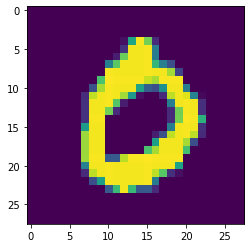

In [33]:
# load a sample image from the test dataset
# to evaluate the model

img = np.asarray(
        Image.open(
            dataset_path + "\\testing\\0\\3.png"
        )
    )
plt.imshow(img)
img = img.reshape((img.shape[0] * img.shape[1]))[:, np.newaxis]

X_n = img

# predict
Z1 = np.dot(W1, X_n) + b1
A1 = sigmoid(Z1)

Z2 = np.dot(W2, A1) + b2
A2 = sigmoid(Z2)

Z3 = np.dot(W3, A2) + b3
A3 = sigmoid(Z3)

print(A3)
